The data I decided to work with is Kepler mission data acquired by NASA. We are sure of its reliability since NASA has used this same data to make large investments on future missions that recieved millions of dollars in funding, such as NASA's Transiting Exoplanet Survey Satellite (TESS) an all-sky survey mission that will discover thousands of exoplanets around nearby bright stars. TESS launched April 18, 2018 aboard a SpaceX Falcon 9 rocket.

In [70]:
# Useful libraries to import as well as my dropna code to clean up my data in a useful manner
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chisquare as chi
from scipy import stats as sp
import matplotlib as mpl
import seaborn as sns

from scipy.stats import mstats, t, chisquare, sem, chi2_contingency, norm

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.neural_network import MLPClassifier


from IPython.display import Image
from sklearn.model_selection import GridSearchCV

k2d = pd.read_csv("SuperExoData.csv", header=0)
k2d = k2d.dropna(axis = 0, how = 'any', thresh = None, inplace = False)

# Miguel Mattis Exoplanet Categorization Project

In [71]:
k2d

,koi_disposition,koi_score,koi_period,koi_duration,koi_depth,koi_ror,koi_prad,koi_sma,koi_incl,koi_teq,...,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,CONFIRMED,1.000,9.488036,2.95750,616.0,0.022344,2.26,0.0853,89.66,793.0,...,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,CONFIRMED,0.969,54.418383,4.50700,875.0,0.027954,2.83,0.2734,89.57,443.0,...,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
2,CANDIDATE,0.000,19.899140,1.78220,10800.0,0.154046,14.60,0.1419,88.96,638.0,...,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826
3,FALSE POSITIVE,0.000,1.736952,2.40641,8080.0,0.387394,33.46,0.0267,67.09,1395.0,...,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,CONFIRMED,1.000,2.525592,1.65450,603.0,0.024064,2.75,0.0374,85.41,1406.0,...,288.75488,48.226200,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.000,0.527699,3.22210,1580.0,0.297633,29.35,0.0128,20.78,2088.0,...,297.18875,47.093819,14.082,14.082,13.501,13.299,13.177,12.200,11.814,11.756
9560,CANDIDATE,0.497,1.739849,3.11400,48.5,0.006379,0.72,0.0290,89.42,1608.0,...,286.50937,47.163219,14.757,15.189,14.687,14.571,14.484,13.641,13.339,13.261
9561,FALSE POSITIVE,0.021,0.681402,0.86500,104.0,0.009444,1.07,0.0157,88.60,2218.0,...,294.16489,47.176281,15.385,15.853,15.347,15.185,15.158,14.220,13.913,13.844
9562,CANDIDATE,0.092,333.486169,3.19900,639.0,0.022590,19.30,1.2233,89.98,557.0,...,296.76288,47.145142,10.998,11.733,10.880,10.682,10.578,9.501,9.027,8.921


The data frame I am working with had missing data points in the master.csv and after trying a few ideas in order to clean up the data our team decided on using our own separate versions of a dropna function. Since our response is qualitative rather than quantitative, I'm going to explore some logistic regression.

In [72]:
k2d.describe()

,koi_score,koi_period,koi_duration,koi_depth,koi_ror,koi_prad,koi_sma,koi_incl,koi_teq,koi_count,...,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
count,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,...,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000,7483.000000
mean,0.493809,37.274701,5.321792,25292.338100,0.150146,26.275555,0.160341,82.161588,1117.031538,1.443672,...,292.089491,43.825993,14.379487,14.943953,14.333471,14.137963,14.036686,13.096817,12.722704,12.648273
std,0.477348,86.127314,6.131285,83426.458086,0.681831,318.299222,0.236456,15.106661,777.210006,0.914188,...,4.774403,3.611944,1.271291,1.395171,1.273526,1.228862,1.206614,1.187556,1.164802,1.167423
min,0.000000,0.259820,0.052000,0.000000,0.001289,0.080000,0.006500,5.260000,92.000000,1.000000,...,279.856080,36.577381,7.391000,7.225000,7.446000,7.627000,6.702000,4.097000,3.014000,2.311000
25%,0.000000,2.464593,2.415550,167.500000,0.012639,1.400000,0.035500,83.240000,607.000000,1.000000,...,288.696215,40.777164,13.615000,14.098000,13.561000,13.413000,13.333000,12.419000,12.086000,12.014000
50%,0.502000,7.727688,3.723200,449.000000,0.022246,2.450000,0.075400,88.160000,929.000000,1.000000,...,292.311650,43.681171,14.641000,15.186000,14.596000,14.397000,14.290000,13.333000,12.930000,12.841000
75%,0.999000,24.239931,5.948275,1720.000000,0.130931,17.620000,0.162000,89.590000,1416.500000,2.000000,...,295.903715,46.735846,15.354500,15.979000,15.304000,15.080000,14.952500,13.995500,13.583000,13.512000
max,1.000000,1071.232624,138.540000,922000.000000,24.662711,26042.900000,1.860000,90.000000,13184.000000,7.000000,...,301.720760,52.336010,17.908000,18.695000,17.831000,17.727000,17.403000,16.728000,16.160000,16.070000


Rough analyzing Below

In [73]:
print(k2d.dtypes)

koi_disposition      object
koi_score           float64
koi_period          float64
koi_duration        float64
koi_depth           float64
koi_ror             float64
koi_prad            float64
koi_sma             float64
koi_incl            float64
koi_teq             float64
koi_count             int64
koi_num_transits    float64
koi_steff           float64
koi_slogg           float64
koi_smet            float64
koi_srad            float64
koi_smass           float64
ra                  float64
dec                 float64
koi_kepmag          float64
koi_gmag            float64
koi_rmag            float64
koi_imag            float64
koi_zmag            float64
koi_jmag            float64
koi_hmag            float64
koi_kmag            float64
dtype: object


In [74]:
print(k2d.shape)

(7483, 27)


In [75]:
k2d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 9563
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   7483 non-null   object 
 1   koi_score         7483 non-null   float64
 2   koi_period        7483 non-null   float64
 3   koi_duration      7483 non-null   float64
 4   koi_depth         7483 non-null   float64
 5   koi_ror           7483 non-null   float64
 6   koi_prad          7483 non-null   float64
 7   koi_sma           7483 non-null   float64
 8   koi_incl          7483 non-null   float64
 9   koi_teq           7483 non-null   float64
 10  koi_count         7483 non-null   int64  
 11  koi_num_transits  7483 non-null   float64
 12  koi_steff         7483 non-null   float64
 13  koi_slogg         7483 non-null   float64
 14  koi_smet          7483 non-null   float64
 15  koi_srad          7483 non-null   float64
 16  koi_smass         7483 non-null   float64


In [76]:
k2d.head()

,koi_disposition,koi_score,koi_period,koi_duration,koi_depth,koi_ror,koi_prad,koi_sma,koi_incl,koi_teq,...,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,CONFIRMED,1.000,9.488036,2.95750,616.0,0.022344,2.26,0.0853,89.66,793.0,...,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,CONFIRMED,0.969,54.418383,4.50700,875.0,0.027954,2.83,0.2734,89.57,443.0,...,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
2,CANDIDATE,0.000,19.899140,1.78220,10800.0,0.154046,14.60,0.1419,88.96,638.0,...,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826
3,FALSE POSITIVE,0.000,1.736952,2.40641,8080.0,0.387394,33.46,0.0267,67.09,1395.0,...,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,CONFIRMED,1.000,2.525592,1.65450,603.0,0.024064,2.75,0.0374,85.41,1406.0,...,288.75488,48.226200,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952


Column identification in order to make an optimal subset.

In [77]:
for col in k2d.columns: 
    print(col) 

koi_disposition
koi_score
koi_period
koi_duration
koi_depth
koi_ror
koi_prad
koi_sma
koi_incl
koi_teq
koi_count
koi_num_transits
koi_steff
koi_slogg
koi_smet
koi_srad
koi_smass
ra
dec
koi_kepmag
koi_gmag
koi_rmag
koi_imag
koi_zmag
koi_jmag
koi_hmag
koi_kmag


pick which columns from the list above seem the most useful. So far getting cut: koi_disposition, koi_score, ra, dec. Group decided on column numbers 3-10, 13-17. 


For simplicity choosing to display information through scatter plots, box plots and histograms w/ density curves

In [78]:
subset = k2d[['koi_disposition','koi_period','koi_duration','koi_depth','koi_ror','koi_prad','koi_sma','koi_incl','koi_teq','koi_steff','koi_slogg','koi_smet','koi_srad','koi_smass']]

In [79]:
subset

,koi_disposition,koi_period,koi_duration,koi_depth,koi_ror,koi_prad,koi_sma,koi_incl,koi_teq,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass
0,CONFIRMED,9.488036,2.95750,616.0,0.022344,2.26,0.0853,89.66,793.0,5455.0,4.467,0.14,0.927,0.919
1,CONFIRMED,54.418383,4.50700,875.0,0.027954,2.83,0.2734,89.57,443.0,5455.0,4.467,0.14,0.927,0.919
2,CANDIDATE,19.899140,1.78220,10800.0,0.154046,14.60,0.1419,88.96,638.0,5853.0,4.544,-0.18,0.868,0.961
3,FALSE POSITIVE,1.736952,2.40641,8080.0,0.387394,33.46,0.0267,67.09,1395.0,5805.0,4.564,-0.52,0.791,0.836
4,CONFIRMED,2.525592,1.65450,603.0,0.024064,2.75,0.0374,85.41,1406.0,6031.0,4.438,0.07,1.046,1.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.527699,3.22210,1580.0,0.297633,29.35,0.0128,20.78,2088.0,5638.0,4.529,0.14,0.903,1.005
9560,CANDIDATE,1.739849,3.11400,48.5,0.006379,0.72,0.0290,89.42,1608.0,6119.0,4.444,-0.04,1.031,1.075
9561,FALSE POSITIVE,0.681402,0.86500,104.0,0.009444,1.07,0.0157,88.60,2218.0,6173.0,4.447,-0.04,1.041,1.104
9562,CANDIDATE,333.486169,3.19900,639.0,0.022590,19.30,1.2233,89.98,557.0,4989.0,2.992,0.07,7.824,2.190


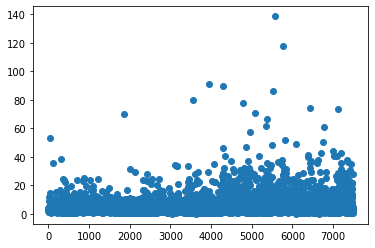

In [80]:
# portion done by the litle homie Loren
#
#i just want to see a plot of the subset with respect to k2c_disp, i want to see if that tells us anything
x = np.arange(subset.shape[0])
plt.scatter(x, subset['koi_duration'])

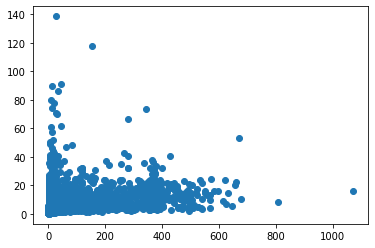

In [81]:
plt.scatter(subset['koi_period'], subset['koi_duration'])

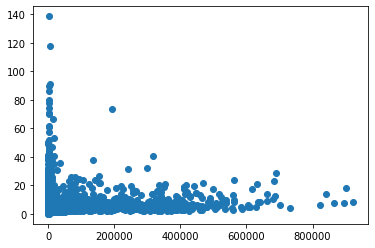

In [82]:
plt.scatter(subset['koi_depth'], subset['koi_duration'])

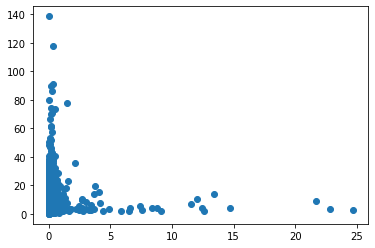

In [83]:
plt.scatter(subset['koi_ror'], subset['koi_duration'])

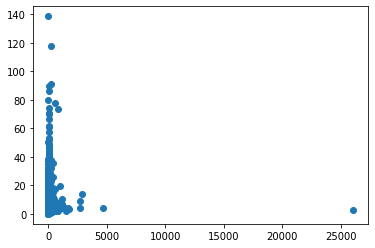

In [84]:
plt.scatter(subset['koi_prad'], subset['koi_duration'])

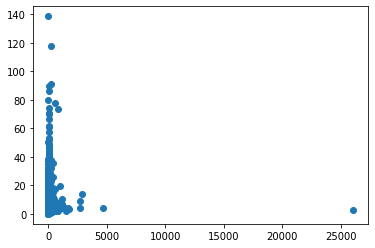

In [85]:
plt.scatter(subset['koi_prad'], subset['koi_duration'])

After running a few other scatter plots I realized the data was not linear and this would not help me as much as I need it to.

In [86]:
k2d.groupby('koi_duration').mean()

,koi_score,koi_period,koi_depth,koi_ror,koi_prad,koi_sma,koi_incl,koi_teq,koi_count,koi_num_transits,...,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
koi_duration,,,,,,,,,,,,,,,,,,,,,
0.0520,0.997,0.875197,0.0,0.003712,0.73,0.0189,62.52,2518.0,2.0,1450.0,...,297.47586,41.114288,13.109,13.585,13.044,12.905,12.846,11.977,11.656,11.635
0.1046,0.000,2.735153,283.0,0.019633,3.27,0.0422,89.23,1679.0,2.0,501.0,...,297.87741,40.120781,13.911,14.279,13.865,13.753,13.701,12.854,12.684,12.602
0.2961,0.000,2.404484,0.8,0.001881,0.48,0.0387,75.19,2078.0,2.0,557.0,...,299.70200,40.896271,13.173,13.696,13.127,12.949,12.834,11.957,11.710,11.632
0.3028,0.000,0.638438,287.0,0.027548,2.48,0.0141,83.43,1709.0,1.0,0.0,...,294.63989,50.334190,15.230,16.007,15.137,14.897,14.762,13.710,13.279,13.152
0.3792,0.965,4.237447,350.0,0.020826,2.26,0.0505,89.87,1172.0,1.0,304.0,...,291.90216,47.962070,15.504,16.000,15.454,15.291,15.176,14.267,13.944,13.821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86.0500,0.000,35.164087,1530.0,0.272181,62.03,0.2136,42.34,756.0,1.0,32.0,...,296.47610,47.703018,13.945,14.583,13.898,13.671,13.538,12.463,12.018,11.943
90.0100,0.000,12.374825,391.0,0.206179,81.01,0.1189,12.23,1253.0,1.0,88.0,...,297.63947,47.445869,13.455,14.223,13.410,13.126,12.966,11.910,11.393,11.312
90.9500,0.000,43.075911,3450.0,0.330482,213.46,0.2453,52.57,1032.0,1.0,26.0,...,294.88538,39.084202,9.927,10.761,9.855,9.569,9.325,8.257,7.736,7.635


In [87]:
mstats.ttest_ind(subset['koi_duration'][subset['koi_disposition']=='CONFIRMED'], subset['koi_duration'][subset['koi_disposition']=='FALSE POSITIVE'])

Ttest_indResult(statistic=-11.563679713059248, pvalue=1.3673906368148247e-30)

In [88]:
columns = list(subset)
for i in columns:
    try:
        result = mstats.ttest_ind(subset[i][subset['koi_disposition']=='CONFIRMED'], subset[i][subset['koi_disposition']=='FALSE POSITIVE'])
        print(i, result)
    except:
        print(i, 'NOT QUANTITATIVE')
        pass

koi_disposition NOT QUANTITATIVE
koi_period Ttest_indResult(statistic=-5.134037266725643, pvalue=2.929051453963879e-07)
koi_duration Ttest_indResult(statistic=-11.563679713059248, pvalue=1.3673906368148247e-30)
koi_depth Ttest_indResult(statistic=-20.650183315422215, pvalue=1.8652394363104895e-91)
koi_ror Ttest_indResult(statistic=-12.442171031526932, pvalue=4.342897590408168e-35)
koi_prad Ttest_indResult(statistic=-4.928019990532416, pvalue=8.539149246535923e-07)
koi_sma Ttest_indResult(statistic=-1.6578074115899826, pvalue=0.09741079909695083)
koi_incl Ttest_indResult(statistic=27.806187276522977, pvalue=8.742410506616465e-160)
koi_teq Ttest_indResult(statistic=-26.780173474178916, pvalue=5.3039769371618775e-149)
koi_steff Ttest_indResult(statistic=-17.865402473586315, pvalue=1.6030073140773125e-69)
koi_slogg Ttest_indResult(statistic=13.231295770215517, pvalue=2.1641371924036603e-39)
koi_smet Ttest_indResult(statistic=27.443254024398765, pvalue=6.186654370804894e-156)
koi_srad Ttest

By testing the null hypothesis through a for loop, we can see that all of the p values in my trimmed dataframe are very nice. Below I will try a decision tree and PCA to see what I can do with that.

In [89]:
predictors = ['koi_disposition','koi_period','koi_duration','koi_depth','koi_ror','koi_prad',
                            'koi_sma','koi_incl','koi_teq','koi_steff','koi_slogg','koi_smet',
              'koi_0srad','koi_smass']
table = k2d[['koi_disposition','koi_period','koi_duration','koi_depth','koi_ror','koi_prad',
                      'koi_sma','koi_incl','koi_teq','koi_steff','koi_slogg','koi_smet','koi_srad','koi_smass']]


In [90]:
features,labels=k2d[['koi_period','koi_duration','koi_depth','koi_ror','koi_prad',
                'koi_sma','koi_incl','koi_teq','koi_steff','koi_slogg','koi_smet',
                'koi_srad','koi_smass']],k2d.loc[:,['koi_disposition']]
print(features.head())

   koi_period  koi_duration  koi_depth   koi_ror  koi_prad  koi_sma  koi_incl  \
0    9.488036       2.95750      616.0  0.022344      2.26   0.0853     89.66   
1   54.418383       4.50700      875.0  0.027954      2.83   0.2734     89.57   
2   19.899140       1.78220    10800.0  0.154046     14.60   0.1419     88.96   
3    1.736952       2.40641     8080.0  0.387394     33.46   0.0267     67.09   
4    2.525592       1.65450      603.0  0.024064      2.75   0.0374     85.41   

   koi_teq  koi_steff  koi_slogg  koi_smet  koi_srad  koi_smass  
0    793.0     5455.0      4.467      0.14     0.927      0.919  
1    443.0     5455.0      4.467      0.14     0.927      0.919  
2    638.0     5853.0      4.544     -0.18     0.868      0.961  
3   1395.0     5805.0      4.564     -0.52     0.791      0.836  
4   1406.0     6031.0      4.438      0.07     1.046      1.095  


In [91]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, test_size=.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5986, 13)
(1497, 13)
(5986, 1)
(1497, 1)


In [92]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

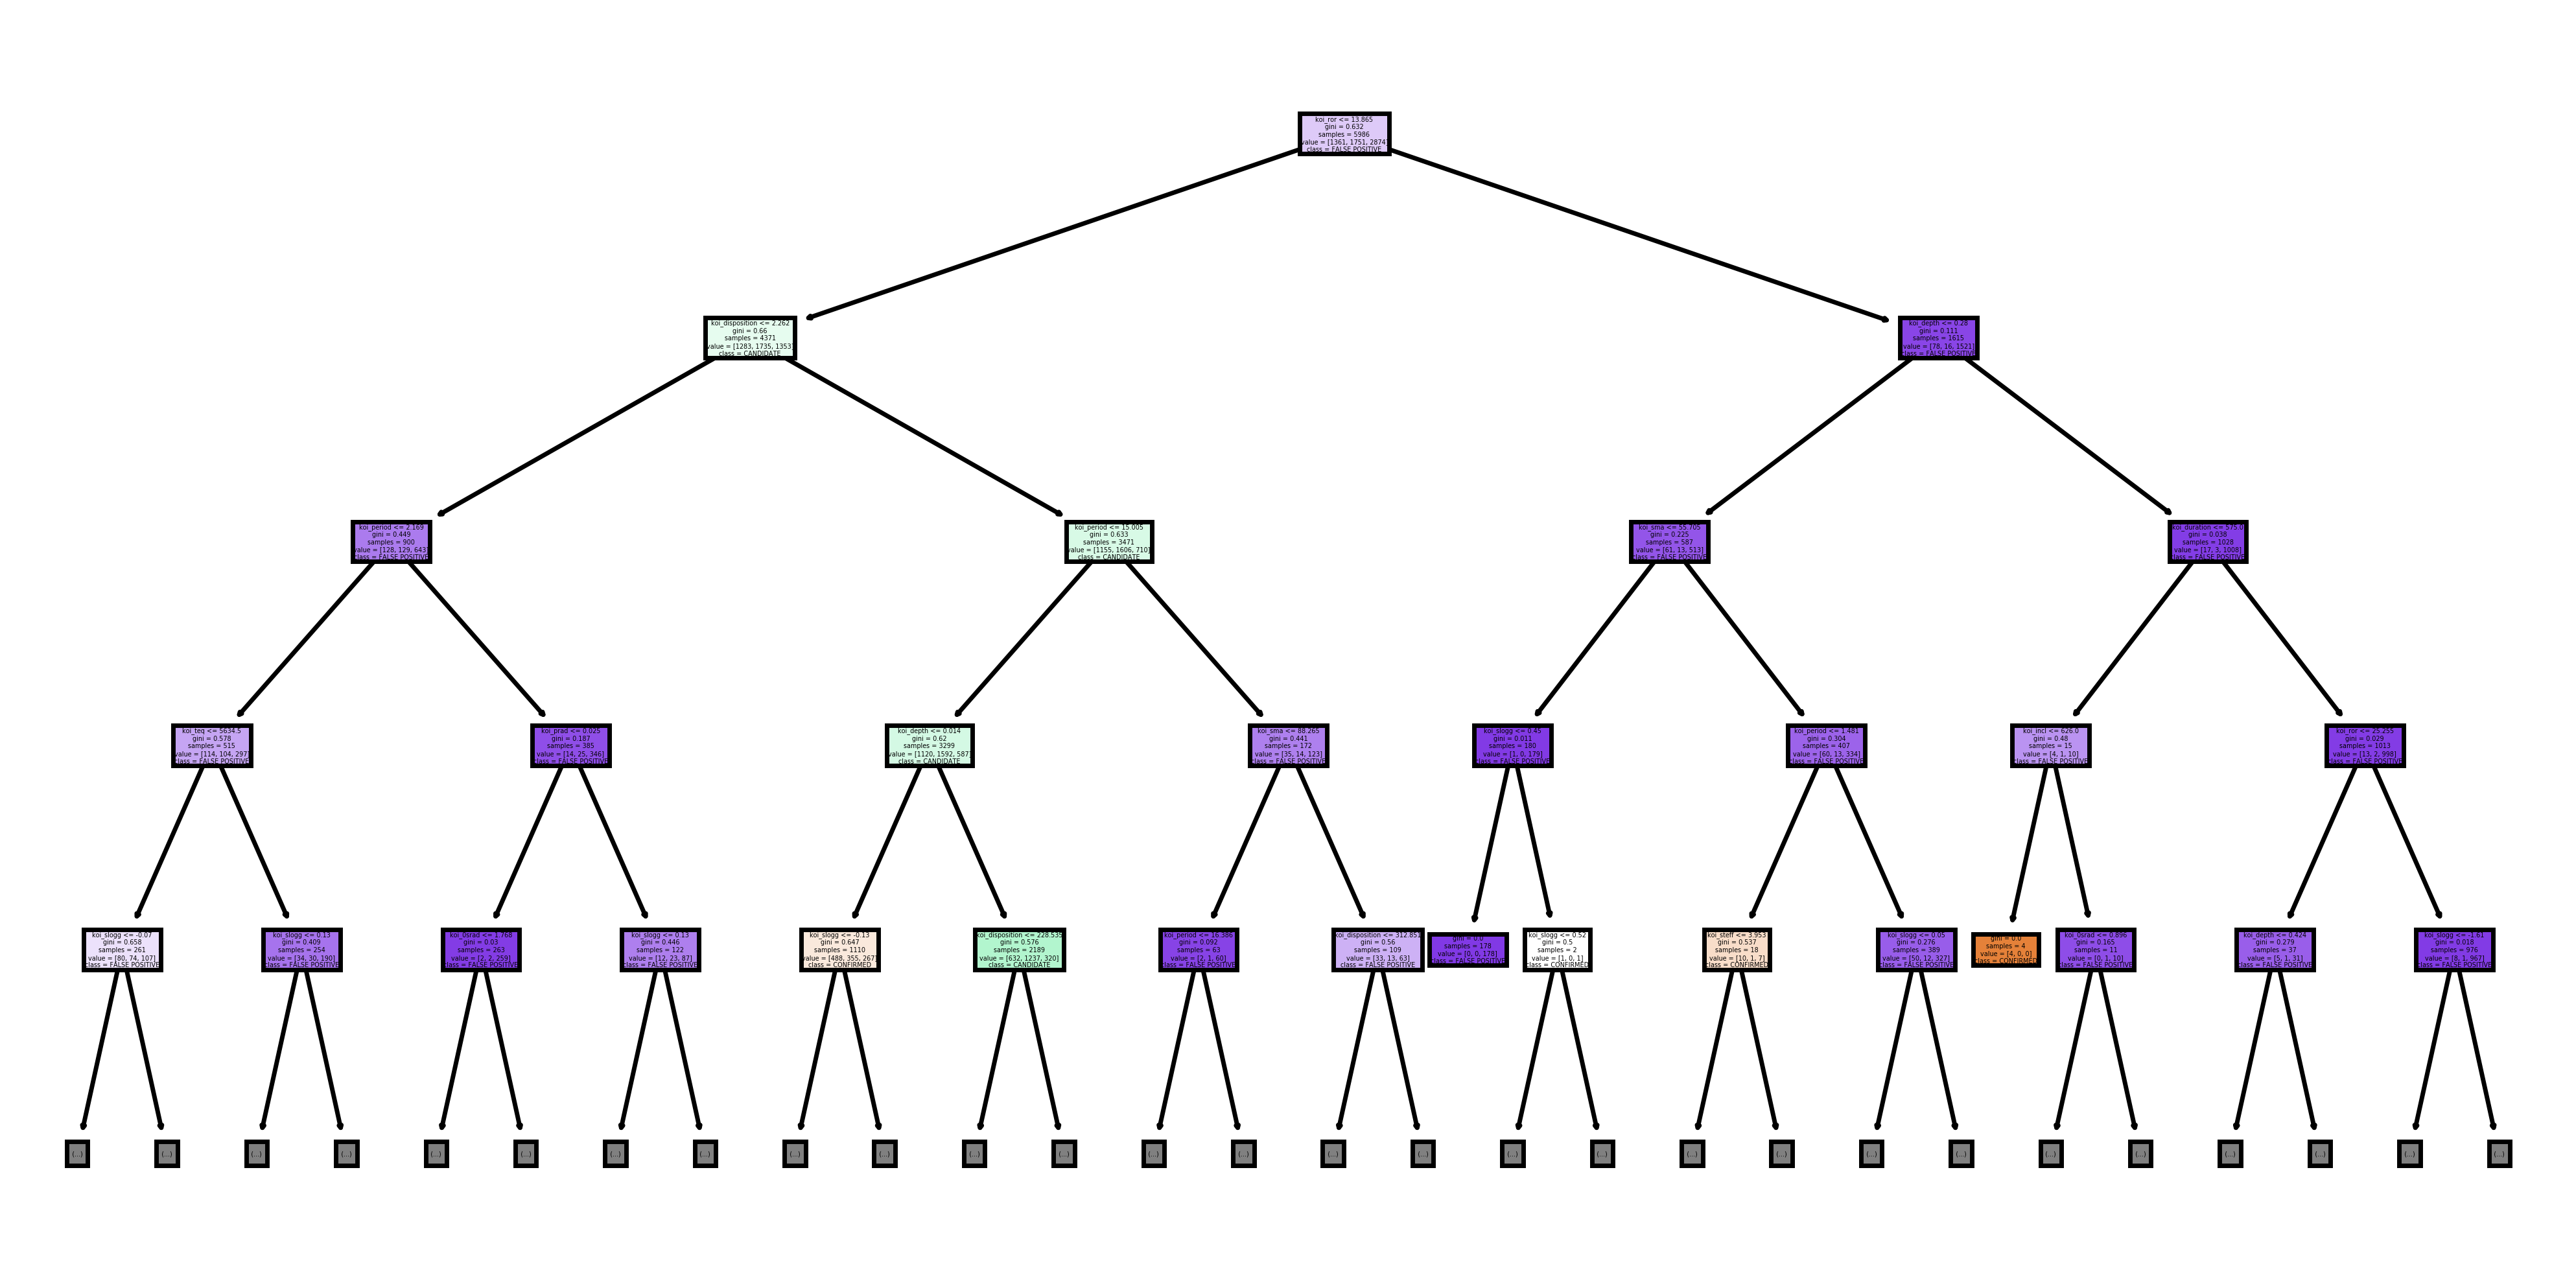

In [93]:
plt.rcParams.update({'font.size':22})
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5), dpi=500)
tree.plot_tree(clf, max_depth=4, feature_names=predictors,class_names=['CONFIRMED','CANDIDATE','FALSE POSITIVE'], 
               filled=True);

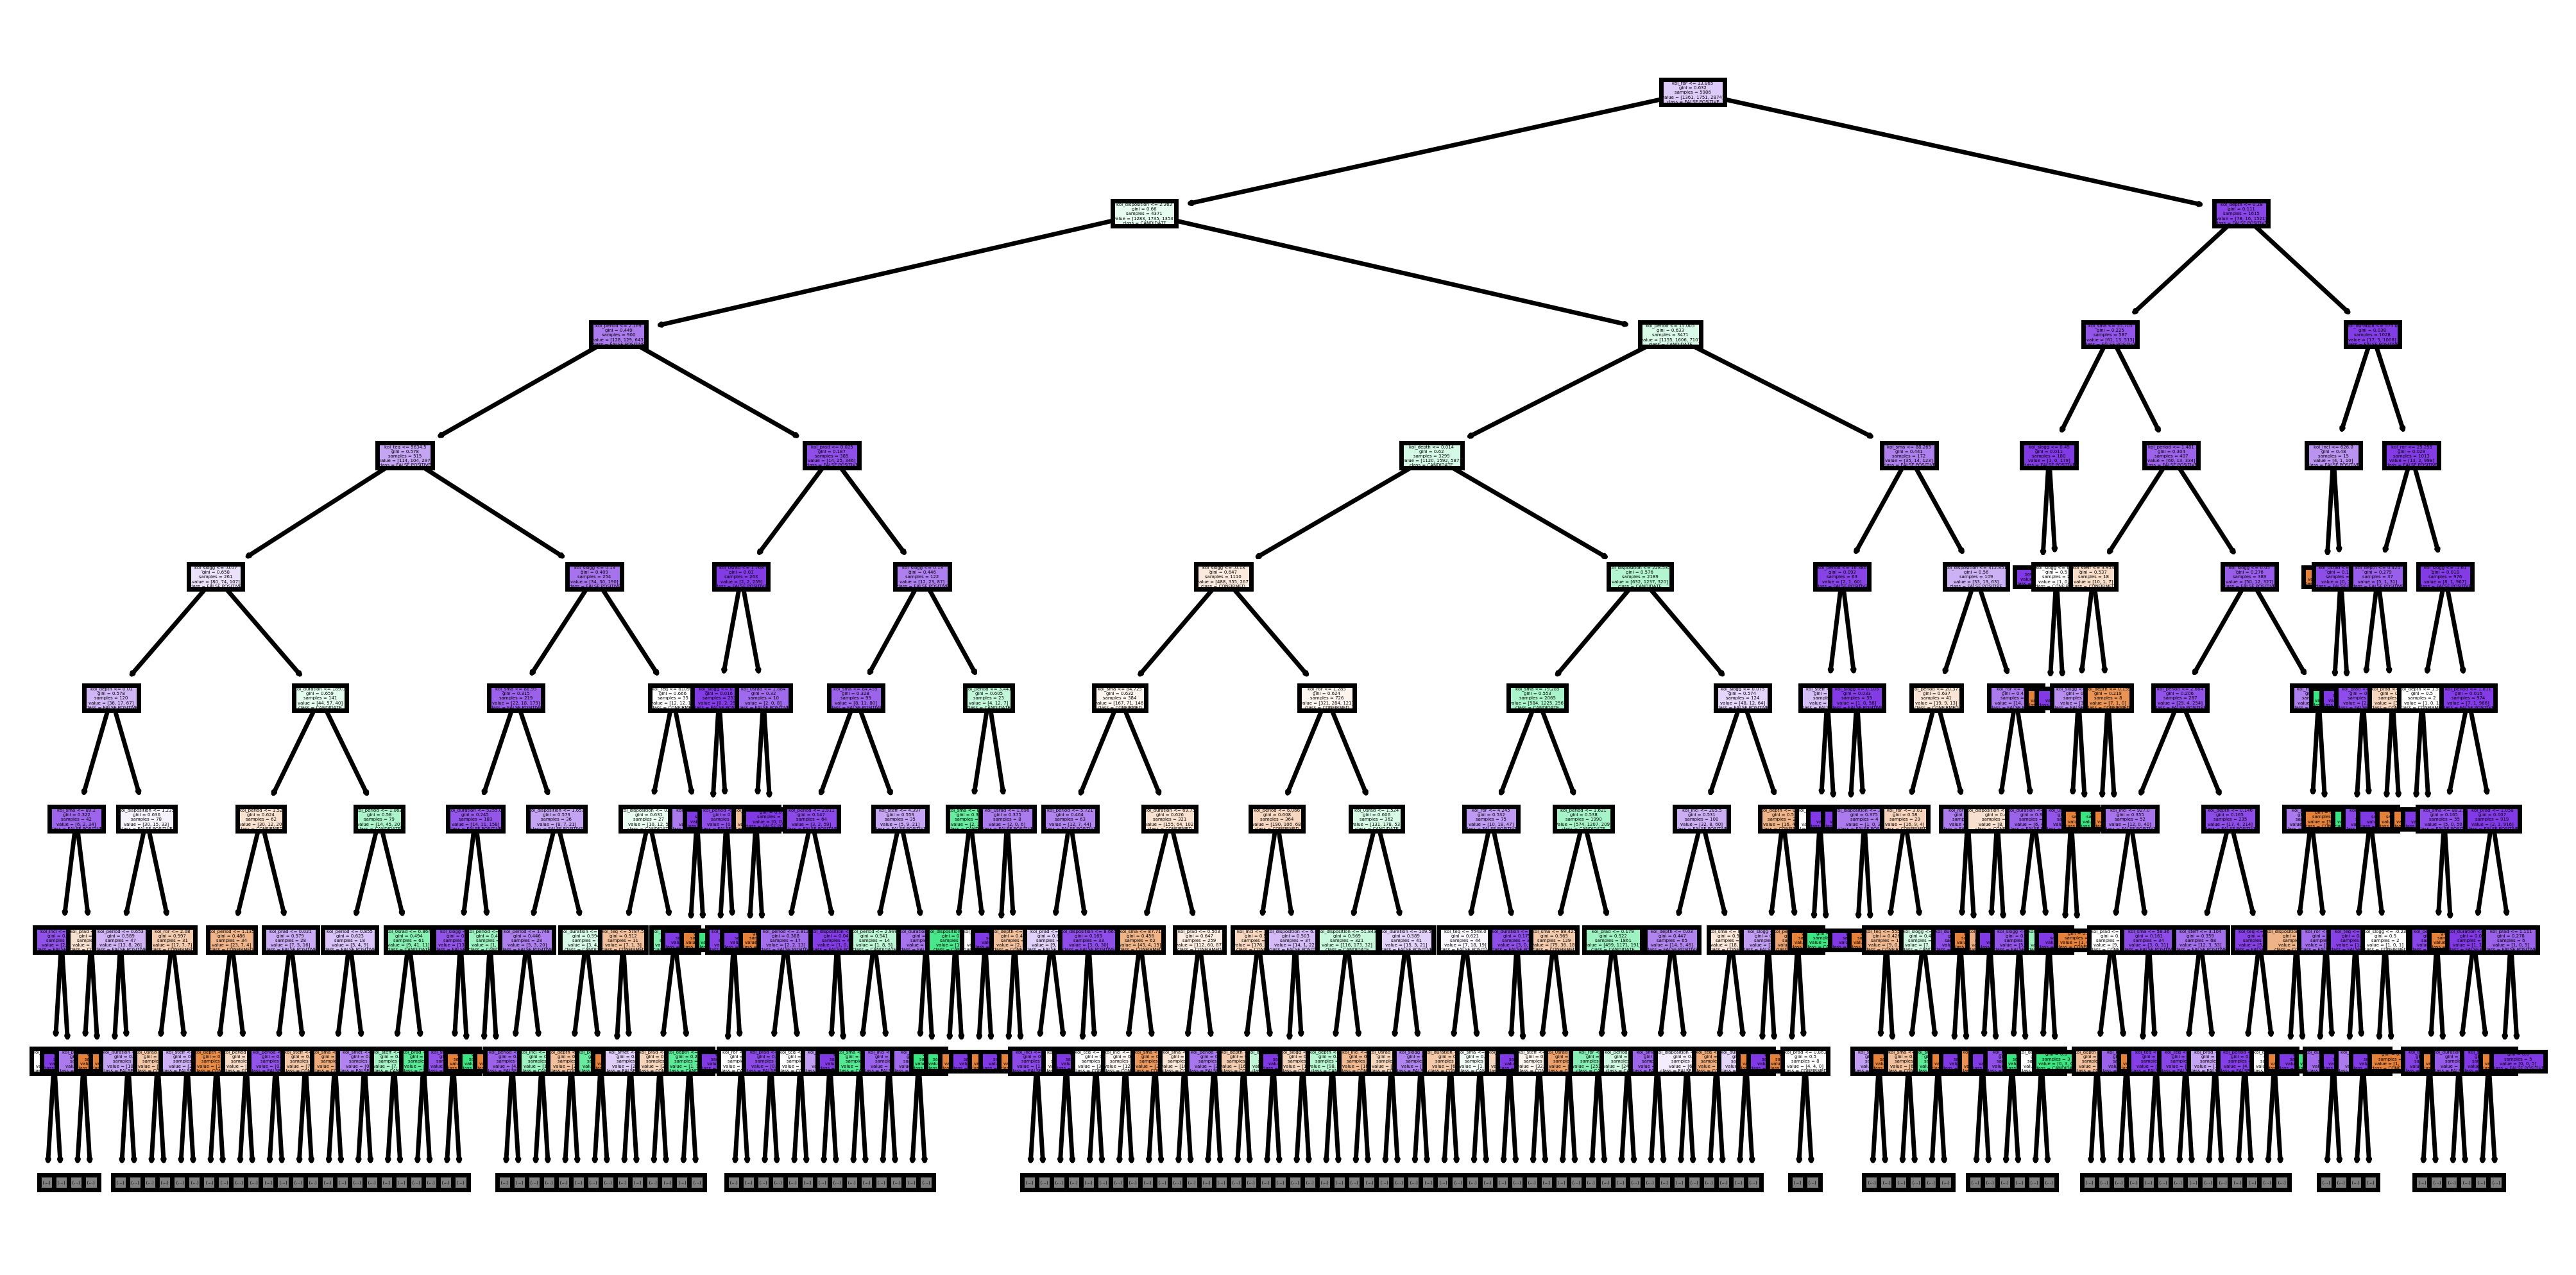

In [94]:
plt.rcParams.update({'font.size':22})
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5), dpi=500)
tree.plot_tree(clf, max_depth=8, feature_names=predictors,class_names=['CONFIRMED','CANDIDATE','FALSE POSITIVE'], 
               filled=True);

Personally I have run several decision trees attempting to try different depths, from 3 up to 10 and what I noticed was that decision trees are ultimately unreliable for categorizing this kind of information. Maybe if I applied some bootstrapping or a comple neural network I could get farther, but in all of the trees I created, I noticed that False Positive are everywhere. Even though the majority of the data in the datafram is categorized as False Positive, I am unsure if this means that more rigorous methods are necessary or the data is inherently skewed. Onto PCA.

In [95]:
x = features
y = labels
x = StandardScaler().fit_transform(x)
pca = PCA()
prinComp = pca.fit_transform(x)
prinDf = pd.DataFrame(data=prinComp)

In [97]:
finalDf=pd.concat([prinDf, k2d['koi_disposition']], axis=1)

Although the project I am turning in is incomplete, I plan on playing with this dataset and seeing what other results I can pull out of it. I believe with collaborative effort involving some of the very intelligent peers I have in this classroom and at FAU I can get similar results to the scientists of NASA. Overall I think PCA may help me understand which predictors contribute to the variance and which may be assimilated in order to create an even tighter dataframe. I am also very interested to see what logistic regression would do to this data. I could utilize the confusion matrix library I imported to help me do this. 